<a href="https://colab.research.google.com/github/Yash-coder-alt/Level_2_Task_/blob/main/Restaurant_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Load Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("Dataset .csv")  # Ensure the file is in the working directory

In [3]:
# Step 3: Basic Inspection
print("First 5 rows of the dataset:")
print(df.head())

print("\nAvailable columns:")
print(df.columns)

First 5 rows of the dataset:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, M

In [4]:
# Step 4: Identify Restaurant Chains
chain_counts = df['Restaurant Name'].value_counts()
chains = chain_counts[chain_counts > 1]

print(f"\nNumber of restaurant chains: {len(chains)}")
print("Sample chains:")
print(chains.head())


Number of restaurant chains: 734
Sample chains:
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Name: count, dtype: int64


In [5]:
# Step 5: Analyze Ratings and Popularity
chain_restaurants = df[df['Restaurant Name'].isin(chains.index)]

chain_analysis = chain_restaurants.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum',
    'Restaurant ID': 'count'
}).rename(columns={'Restaurant ID': 'Branch Count'})

chain_analysis = chain_analysis.sort_values(by='Votes', ascending=False)

print("\nTop 10 popular restaurant chains:")
print(chain_analysis.head(10))


Top 10 popular restaurant chains:
                           Aggregate rating  Votes  Branch Count
Restaurant Name                                                 
Barbeque Nation                    4.353846  28142            26
AB's - Absolute Barbecues          4.825000  13400             4
Big Chill                          4.475000  10853             4
Farzi Cafe                         4.366667  10098             6
Truffles                           3.950000   9682             2
Chili's                            4.580000   8156             5
Joey's Pizza                       4.250000   7807             2
Big Yellow Door                    4.266667   7511             3
Saravana Bhavan                    4.133333   7238             3
Starbucks                          3.805556   7139            18


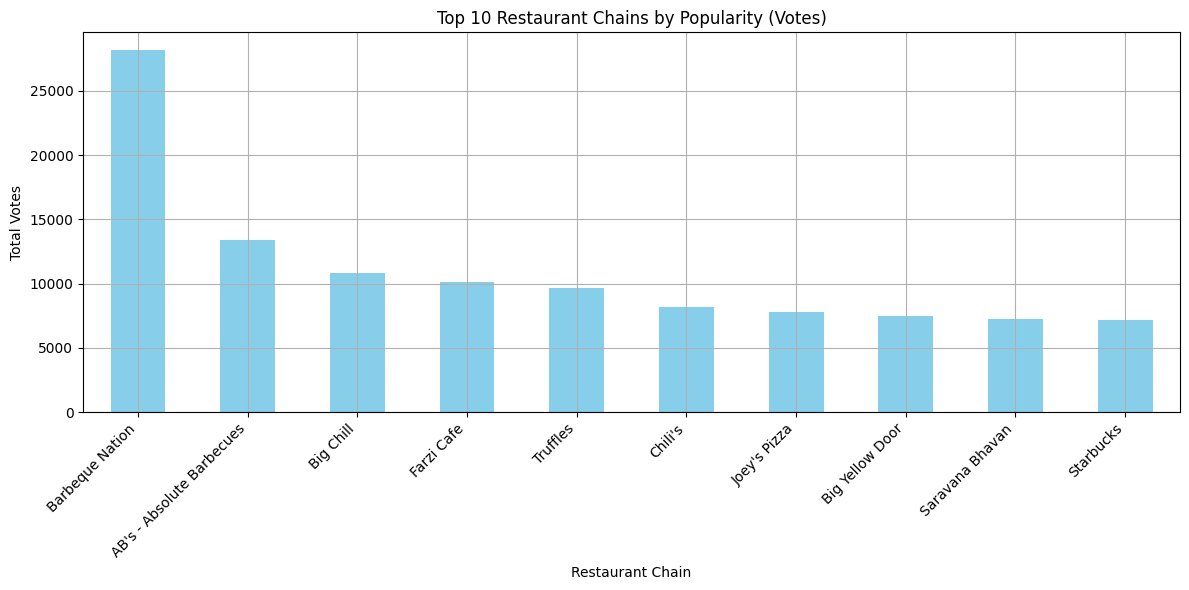

In [6]:
# Step 6: Visualization - Top 10 Chains by Votes
top_chains = chain_analysis.head(10)

plt.figure(figsize=(12,6))
top_chains['Votes'].plot(kind='bar', color='skyblue')
plt.title('Top 10 Restaurant Chains by Popularity (Votes)')
plt.ylabel('Total Votes')
plt.xlabel('Restaurant Chain')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()



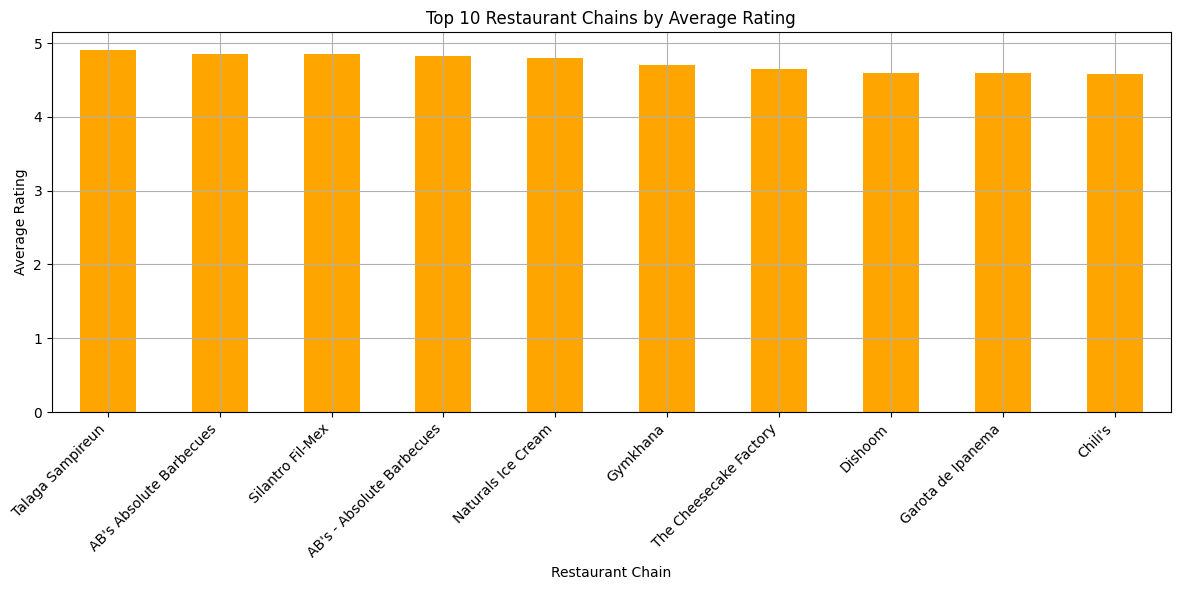

In [7]:
# Step 7: Visualization - Top 10 Chains by Average Rating
top_chains_rating = chain_analysis.sort_values(by='Aggregate rating', ascending=False).head(10)

plt.figure(figsize=(12,6))
top_chains_rating['Aggregate rating'].plot(kind='bar', color='orange')
plt.title('Top 10 Restaurant Chains by Average Rating')
plt.ylabel('Average Rating')
plt.xlabel('Restaurant Chain')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()